# Preprocessing

- Loading Libraries
- Loading data
- Data Cleaning (Missing values)
- Statistical summary
- EDA
    - Univariant 
    - Multivariant

- Categorical Features
- Feature Engineering (Cardinality, Multicollinearity...)
- Scaling 

In [1]:
# Libraries

import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
# root folder
project_dir = Path().resolve().parent

# Data Folder
data_dir = project_dir / "data"

# file_path of the dataset
house_data = data_dir / "train.csv"

house_data
# project_dir

WindowsPath('C:/Users/user/Desktop/housing_prediction_DF_proj_1/data/train.csv')

In [3]:
# Load Dataset into DataFrame
df = pd.read_csv(house_data)

df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## Data Cleaning

In [4]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
# Check for missing values
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

## Analyzing the Numeric Features

In [6]:
# Numeric columns only
df_num = df.select_dtypes(include='number')

df_num.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [7]:
# buildings under construction

df_num["UNDER_CONSTRUCTION"].value_counts()

UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64

In [8]:
# I dont know what RERA is

df_num["RERA"].value_counts()

RERA
0    20088
1     9363
Name: count, dtype: int64

In [9]:
# ---- without Transformation -----
unique_num = df_num["BHK_NO."].unique()

print(f"Unique BHK_No: {unique_num}")
print(df_num["BHK_NO."].value_counts())

Unique BHK_No: [ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]
BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
10        4
20        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64


In [10]:
# Statistical summary of SQUARE_FT column without transformation
stat = df_num["SQUARE_FT"].describe()

print(stat.to_string(float_format="{:,.2f}".format))

count        29,451.00
mean         19,802.17
std       1,901,334.91
min               3.00
25%             900.02
50%           1,175.06
75%           1,550.69
max     254,545,454.50


In [11]:
# Statistical summary of TARGET(PRICE_IN_LACS) column without transformation

df_num["TARGET(PRICE_IN_LACS)"].describe()

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

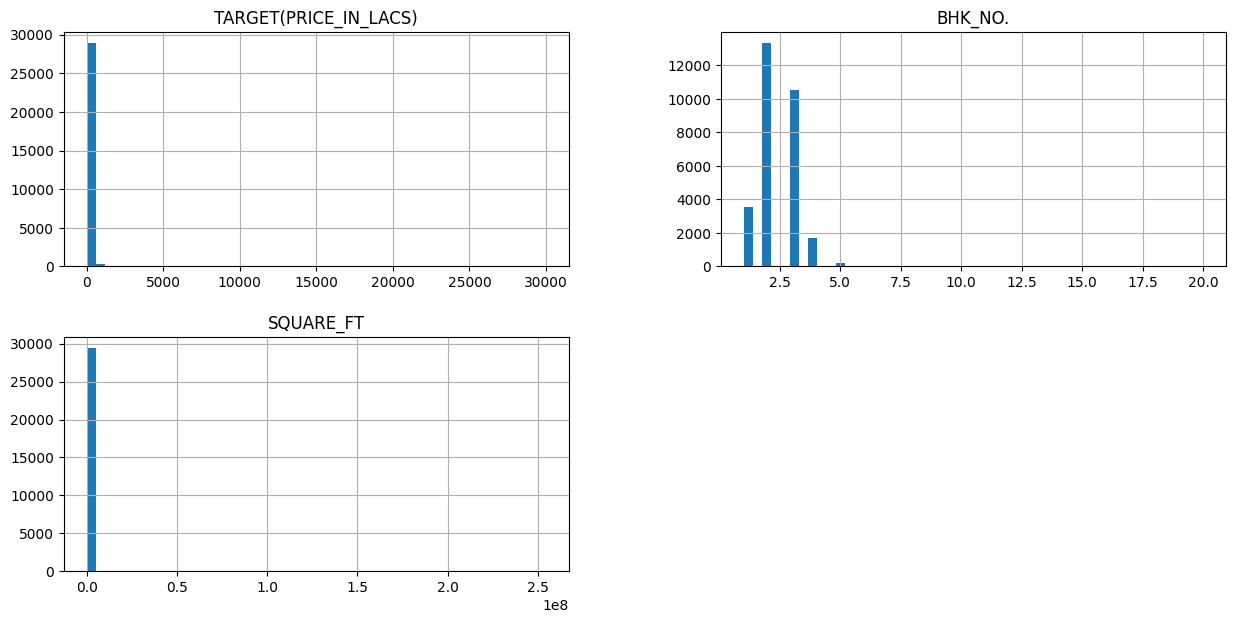

In [12]:
# Without Transformation

df_num.hist(column=["TARGET(PRICE_IN_LACS)", "BHK_NO.", "SQUARE_FT"], bins=50, figsize=(15,7))
plt.show()

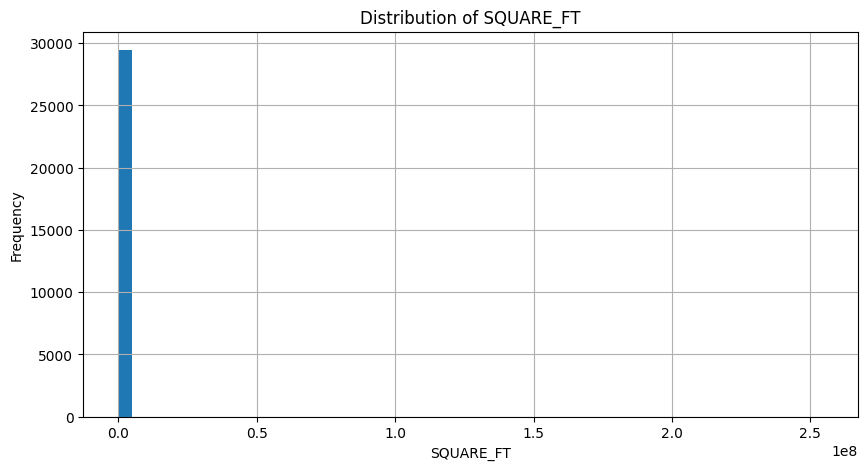

In [14]:
# without Transformation

df_num["SQUARE_FT"].hist(bins=50, figsize=(10,5))
plt.title("Distribution of SQUARE_FT")
plt.xlabel("SQUARE_FT")
plt.ylabel("Frequency")
plt.show()

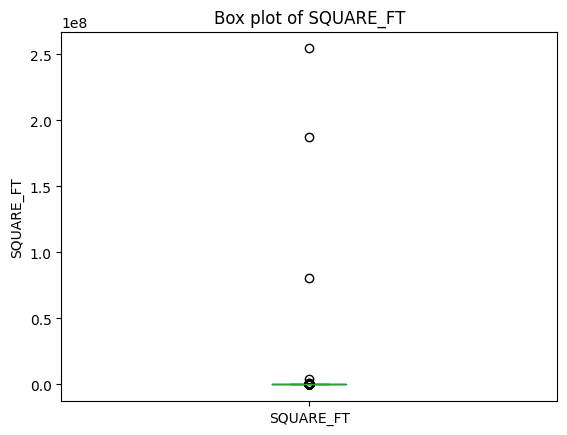

In [15]:
# without transformation

df_num["SQUARE_FT"].plot.box()
plt.title("Box plot of SQUARE_FT")
plt.ylabel("SQUARE_FT")
plt.show()

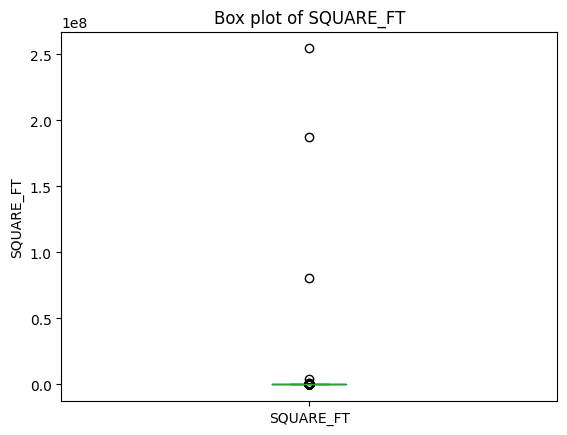

In [16]:
# with transformation

df_num["SQUARE_FT"].plot.box()
plt.title("Box plot of SQUARE_FT")
plt.ylabel("SQUARE_FT")
plt.show()

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

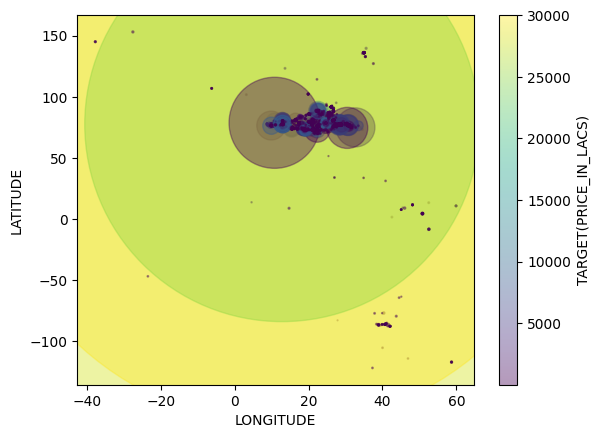

In [17]:
# without transformation

df_num.plot(
    kind='scatter', 
    x="LONGITUDE", 
    y="LATITUDE",
    alpha=0.4,
    s=df_num["SQUARE_FT"]/1e3,
    c="TARGET(PRICE_IN_LACS)",
    colorbar=True,
)

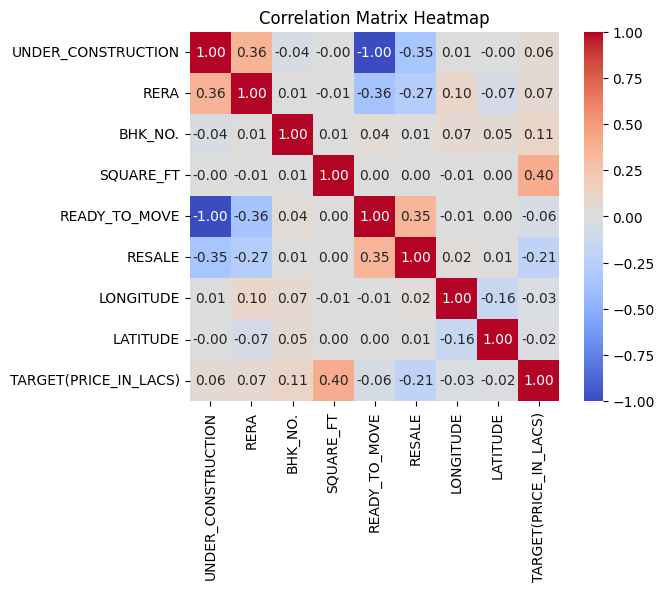

In [19]:
corr_mat = df_num.corr()

sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
)
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: >

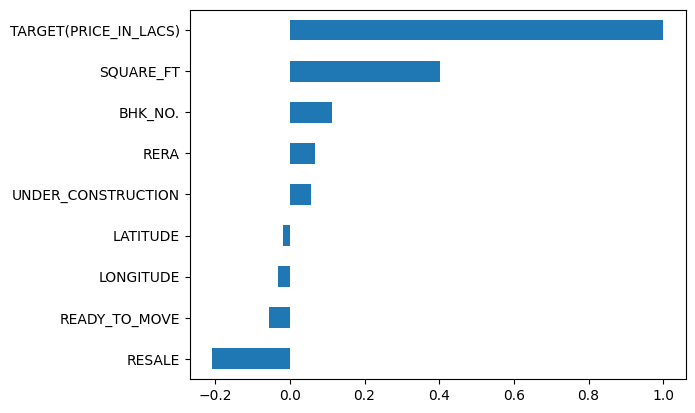

In [21]:
corr_mat["TARGET(PRICE_IN_LACS)"].sort_values(ascending=True).plot(kind="barh")

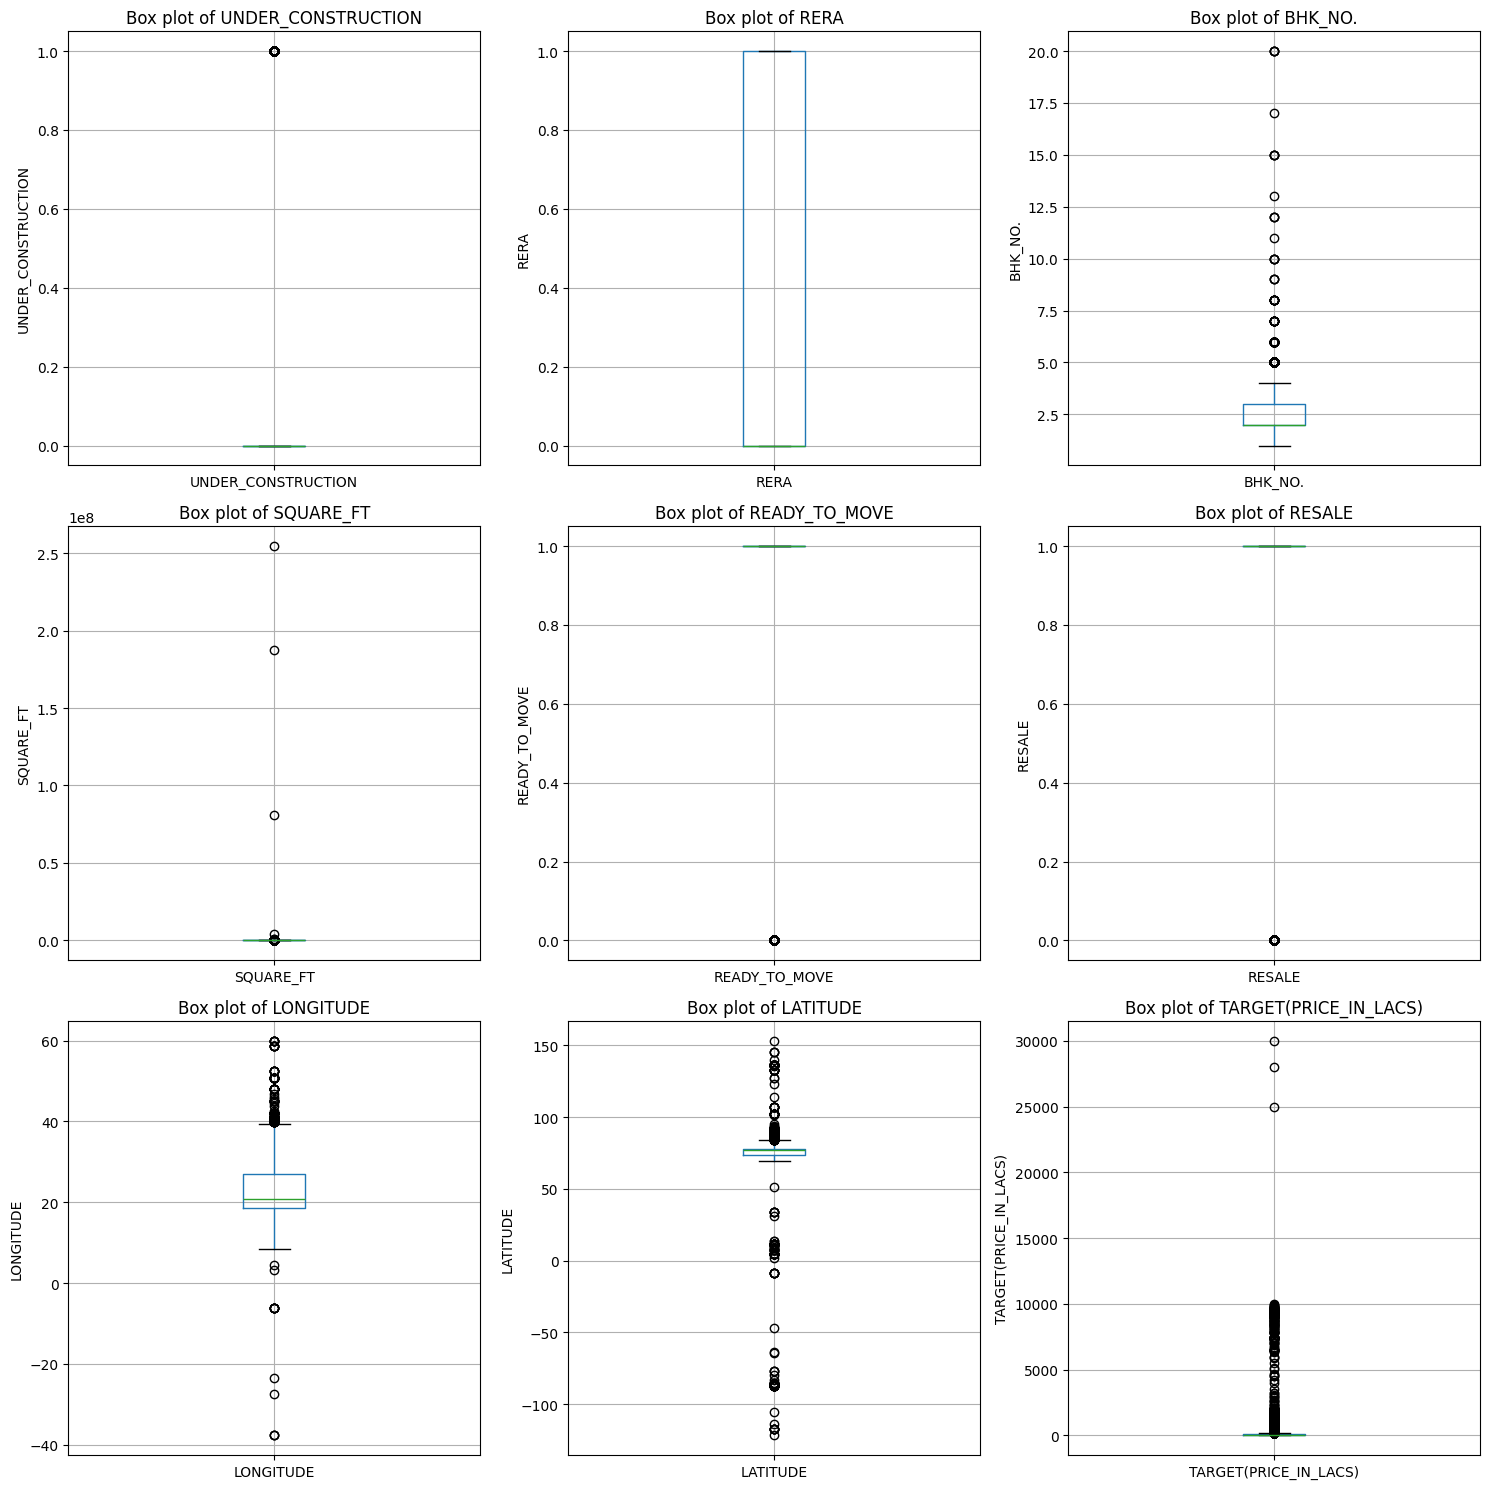

In [22]:
# list of columns
num_features = df_num.columns

# subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15), sharex=False, sharey=False)

for i, col in enumerate(num_features):
    df_num.boxplot(column=col, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f"Box plot of {col}")
    ax[i//3, i%3].set_ylabel(col)
plt.tight_layout()
plt.show()

## Categorical Features


In [24]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [25]:
# selecting categorical features
df_cat = df.select_dtypes(include='object')

df_cat.head()

,POSTED_BY,BHK_OR_RK,ADDRESS
0,Owner,BHK,"Ksfc Layout,Bangalore"
1,Dealer,BHK,"Vishweshwara Nagar,Mysore"
2,Owner,BHK,"Jigani,Bangalore"
3,Owner,BHK,"Sector-1 Vaishali,Ghaziabad"
4,Dealer,BHK,"New Town,Kolkata"


In [26]:
# Unique values in POSTED_BY column

df_cat["POSTED_BY"].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

Text(0, 0.5, 'Count')

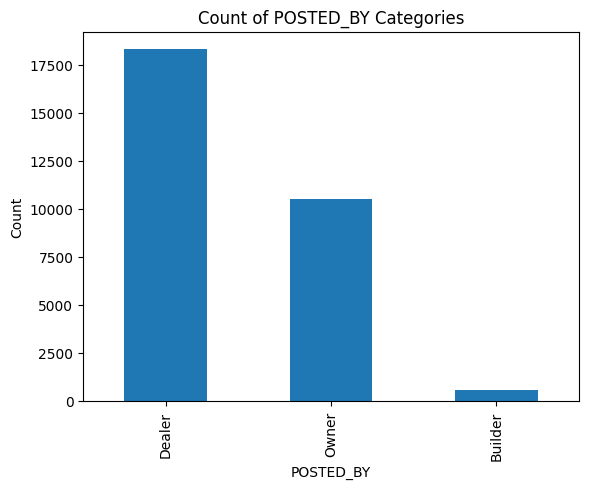

In [22]:
# Count plot of POSTED_BY categories

df_cat["POSTED_BY"].value_counts().plot(kind="bar")
plt.title("Count of POSTED_BY Categories")
plt.xlabel("POSTED_BY") 
plt.ylabel("Count")

In [27]:
# Unique values in BHK_OR_RK column

df_cat["BHK_OR_RK"].unique()

array(['BHK', 'RK'], dtype=object)

Text(0, 0.5, 'Count')

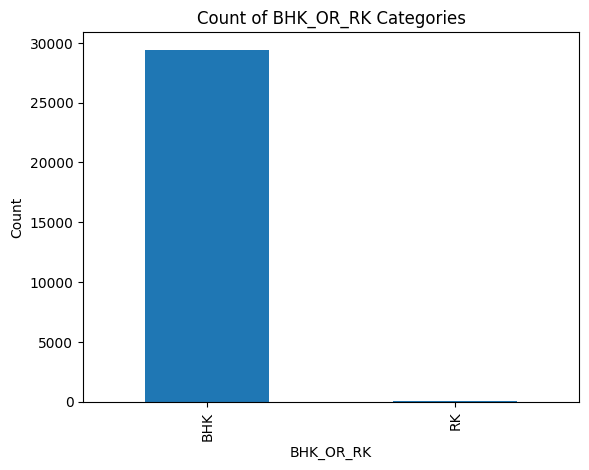

In [24]:
# Count plot of BHK_OR_RK categories

df_cat["BHK_OR_RK"].value_counts().plot(kind="bar")
plt.title("Count of BHK_OR_RK Categories")
plt.xlabel("BHK_OR_RK")
plt.ylabel("Count")

In [28]:
# Unique values in ADDRESS column

df_cat["ADDRESS"].nunique()

6899

In [29]:
# Create CITY column from ADDRESS

df_cat["CITY"] = (
                    df_cat["ADDRESS"]
                    .str.split(",")
                    .str[-1]
                    .str.strip()
                )

df_cat.head()

,POSTED_BY,BHK_OR_RK,ADDRESS,CITY
0,Owner,BHK,"Ksfc Layout,Bangalore",Bangalore
1,Dealer,BHK,"Vishweshwara Nagar,Mysore",Mysore
2,Owner,BHK,"Jigani,Bangalore",Bangalore
3,Owner,BHK,"Sector-1 Vaishali,Ghaziabad",Ghaziabad
4,Dealer,BHK,"New Town,Kolkata",Kolkata


In [30]:
# unique cities

df_cat["CITY"].nunique()

256

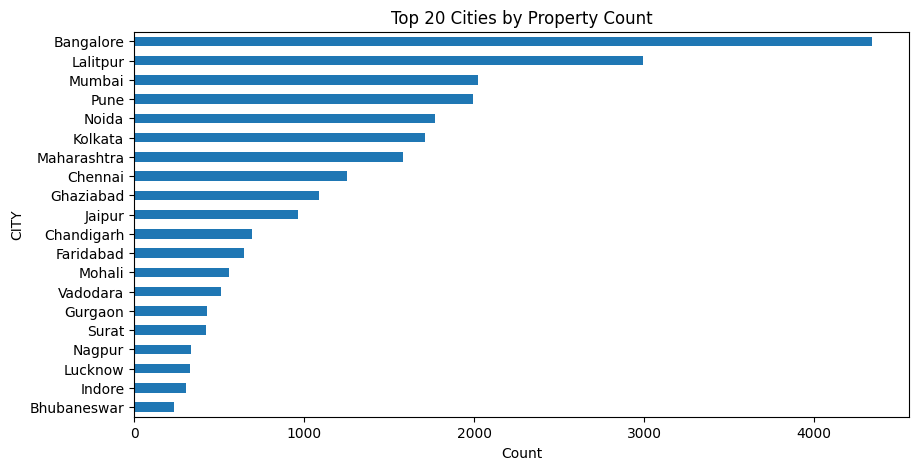

In [31]:
# Top 10 cities by property count

df_cat["CITY"].value_counts(ascending=True).tail(20).plot(kind="barh", figsize=(10,5))
plt.title("Top 20 Cities by Property Count")
plt.xlabel("Count");

## Numeric and Categorical Data Combined

In [32]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [33]:
df["CITY"] = (
                df["ADDRESS"]
                .str.split(",")
                .str[-1]
                .str.strip()
            )

df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


Text(0.5, 0.98, '')

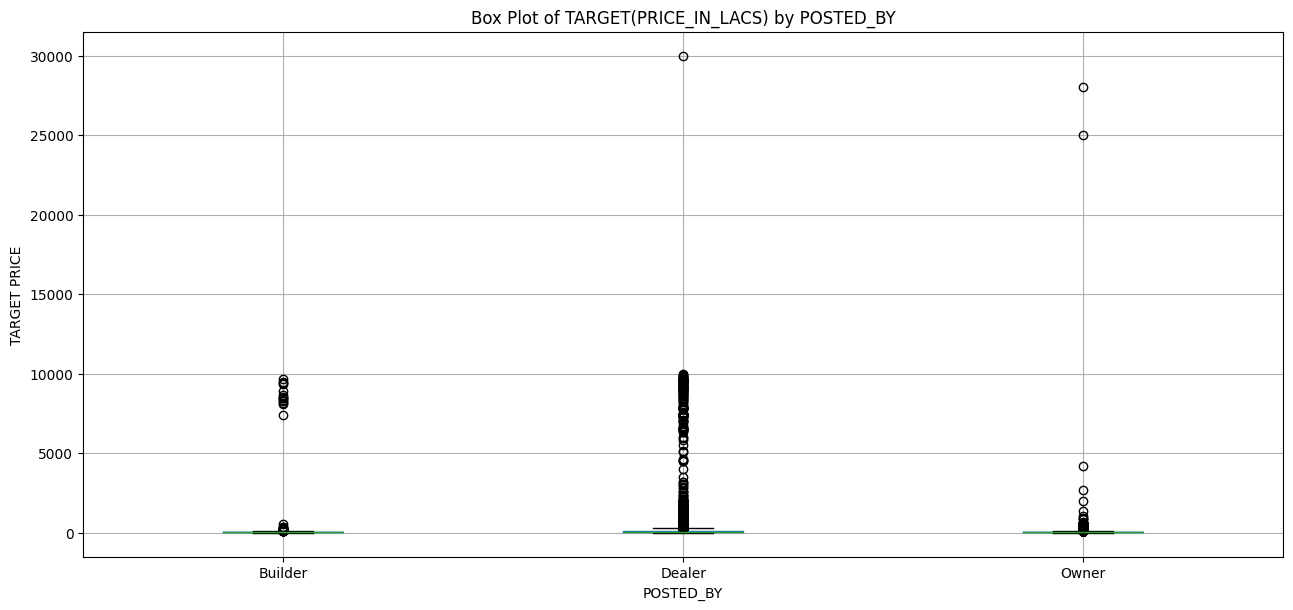

In [37]:
# Box plot of TARGET(PRICE_IN_LACS) by POSTED_BY

df.boxplot(column="TARGET(PRICE_IN_LACS)", by="POSTED_BY", figsize=(15,7))
plt.title("Box Plot of TARGET(PRICE_IN_LACS) by POSTED_BY")
plt.xlabel("POSTED_BY")
plt.ylabel("TARGET PRICE")
plt.suptitle("")  # Suppress the automatic title to avoid overlap


Text(0.5, 0.98, '')

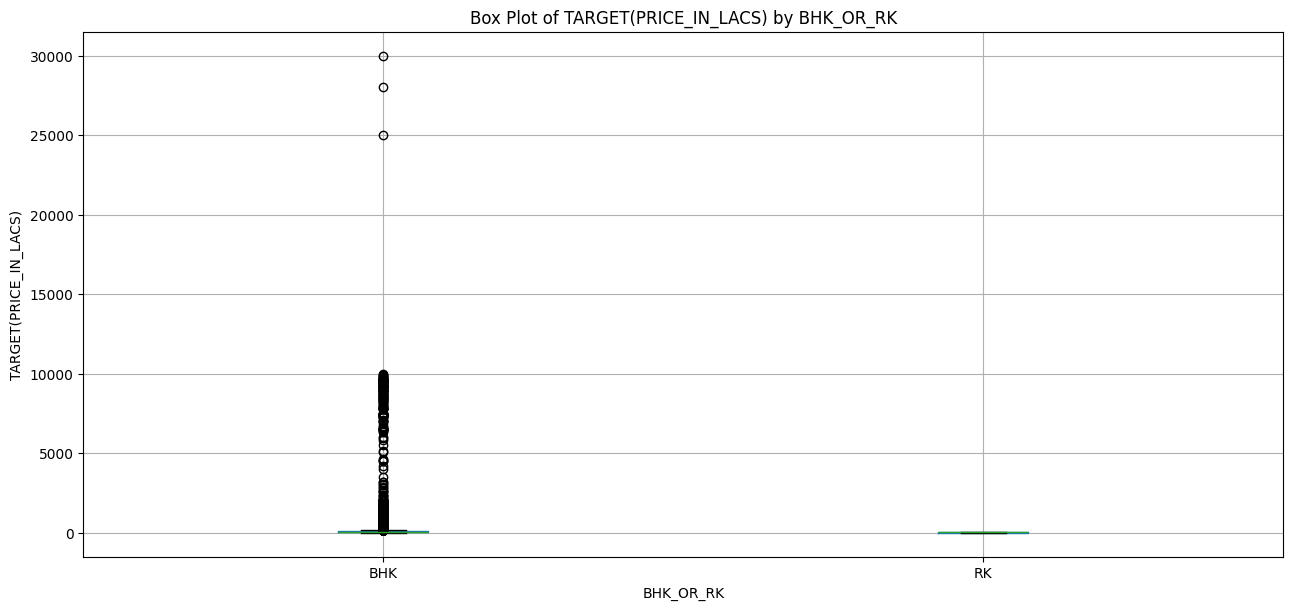

In [38]:
# box plot of TARGET(PRICE_IN_LACS) by BHK_OR_RK

df.boxplot(column="TARGET(PRICE_IN_LACS)", by="BHK_OR_RK", figsize=(15,7))
plt.title("Box Plot of TARGET(PRICE_IN_LACS) by BHK_OR_RK")
plt.ylabel("TARGET(PRICE_IN_LACS)")
plt.suptitle("")  # Suppress the automatic title to avoid overlap

In [35]:
# ------ Log Transformation -----


# list of highly skewed features
log_features = ["SQUARE_FT", "TARGET(PRICE_IN_LACS)"]

# Create new but log transformed features
for col in log_features:
    df[col + "_LOG"] = np.log1p(df[col])

df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,SQUARE_FT_LOG,TARGET(PRICE_IN_LACS)_LOG
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,7.171070,4.025352
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,7.151485,3.951244
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,6.839647,3.784190
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,6.836175,4.151040
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,6.907765,4.119037


In [39]:
df["BHK_NO."].apply(lambda x: min(x, 8)).unique()

array([2, 3, 1, 4, 5, 6, 8, 7])

In [39]:
# -------- Capping BHK_NO. ---------

BHK_CAP = 6

df["BHK_NO._CAPPED"] = (
    df["BHK_NO."]
    .apply(lambda x: min(x, BHK_CAP))
)

df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,SQUARE_FT_LOG,TARGET(PRICE_IN_LACS)_LOG,BHK_NO._CAPPED
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,7.171070,4.025352,2
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,7.151485,3.951244,2
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,6.839647,3.784190,2
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,6.836175,4.151040,2
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,6.907765,4.119037,2


In [40]:
# -------- Capping LATITUDE and LONGITUDE ---------

# Latitude IQR calculation
lat_Q1 = df["LATITUDE"].quantile(0.25)
lat_Q3 = df["LATITUDE"].quantile(0.75)
lat_IQR = lat_Q3 - lat_Q1

# upper and lower bounds for Latitude
lat_lower_bound = lat_Q1 - 1.5 * lat_IQR
lat_upper_bound = lat_Q3 + 1.5 * lat_IQR

# clipped latitude
df["LATITUDE_CLIPPED"] = (
    df["LATITUDE"]
    .clip(lower=lat_lower_bound, upper=lat_upper_bound)
)


# Longitude IQR calculation
long_Q1 = df["LONGITUDE"].quantile(0.25)   
long_Q3 = df["LONGITUDE"].quantile(0.75)
long_IQR = long_Q3 - long_Q1

# upper and lower bounds for Longitude
long_lower_bound = long_Q1 - 1.5 * long_IQR
long_higher_bound = long_Q3 + 1.5 * long_IQR

# clipped longitude
df["LONGITUDE_CLIPPED"] = (
    df["LONGITUDE"]
    .clip(lower=long_lower_bound, upper=long_higher_bound)
)

df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,SQUARE_FT_LOG,TARGET(PRICE_IN_LACS)_LOG,BHK_NO._CAPPED,LATITUDE_CLIPPED,LONGITUDE_CLIPPED
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,7.171070,4.025352,2,77.597960,12.969910
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,7.151485,3.951244,2,76.644605,12.274538
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,6.839647,3.784190,2,77.632191,12.778033
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,6.836175,4.151040,2,77.344500,28.642300
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,6.907765,4.119037,2,83.874699,22.592200


## Wrangle Function

In [41]:
def transform_data(df):
    """
    Function to perform data wrangling and preprocessing on the housing dataset.
    """
    # ------------ Create CITY column from ADDRESS ------------
    df["CITY"] = (
        df["ADDRESS"]
        .str.split(",")
        .str[-1]
        .str.strip()
    )


    #------------ Log Transformation of TARGET(PRICE_IN_LACS) --------------
    log_features = ["TARGET(PRICE_IN_LACS)"]
    for col in log_features:
        df[col + "_LOG"] = np.log1p(df[col])


    # --------------- Capping BHK_NO. -----------------------
    BHK_CAP = 6
    df["BHK_NO._CAPPED"] = (
        df["BHK_NO."]
        .apply(lambda x: min(x, BHK_CAP))
    )


    # ------------ Clipping LATITUDE ---------------
    lat_Q1 = df["LATITUDE"].quantile(0.25)
    lat_Q3 = df["LATITUDE"].quantile(0.75)
    lat_IQR = lat_Q3 - lat_Q1

    # upper and lower bounds for Latitude
    lat_lower_bound = lat_Q1 - 1.5 * lat_IQR
    lat_upper_bound = lat_Q3 + 1.5 * lat_IQR

    # clipped latitude
    df["LATITUDE_CLIPPED"] = (
        df["LATITUDE"]
        .clip(lower=lat_lower_bound, upper=lat_upper_bound)
    )


    # ------------ Clipping LONGITUDE ---------------
    long_Q1 = df["LONGITUDE"].quantile(0.25)   
    long_Q3 = df["LONGITUDE"].quantile(0.75)
    long_IQR = long_Q3 - long_Q1

    # upper and lower bounds for Longitude
    long_lower_bound = long_Q1 - 1.5 * long_IQR
    long_higher_bound = long_Q3 + 1.5 * long_IQR

    # clipped longitude
    df["LONGITUDE_CLIPPED"] = (
        df["LONGITUDE"]
        .clip(lower=long_lower_bound, upper=long_higher_bound)
    )



    # ------------ Clipping SQUARE_FT_LOG ---------------
    sqr_ft_Q1 = df["SQUARE_FT"].quantile(0.25)
    sqr_ft_Q3 = df["SQUARE_FT"].quantile(0.75)
    sqr_ft_IQR = sqr_ft_Q3 - sqr_ft_Q1  

    # upper and lower bounds for SQUARE_FT
    sqr_ft_lower_bound = sqr_ft_Q1 - 1.5 * sqr_ft_IQR
    sqr_ft_higher_bound = sqr_ft_Q3 + 1.5 * sqr_ft_IQR

    # clipped SQUARE_FT
    df["SQUARE_FT_CLIPPED"] = (
        df["SQUARE_FT"]
        .clip(lower=sqr_ft_lower_bound, upper=sqr_ft_higher_bound)
    )   

    
    # Drop unnecessary columns
    drop_cols = ["ADDRESS", "BHK_NO.","SQUARE_FT", "LATITUDE", "LONGITUDE", "TARGET(PRICE_IN_LACS)"]
    df = df.drop(columns=drop_cols)

    return df

In [42]:
df = transform_data(df)
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,READY_TO_MOVE,RESALE,CITY,SQUARE_FT_LOG,TARGET(PRICE_IN_LACS)_LOG,BHK_NO._CAPPED,LATITUDE_CLIPPED,LONGITUDE_CLIPPED,SQUARE_FT_CLIPPED
0,Owner,0,0,BHK,1,1,Bangalore,7.171070,4.025352,2,77.597960,12.969910,1300.236407
1,Dealer,0,0,BHK,1,1,Mysore,7.151485,3.951244,2,76.644605,12.274538,1275.000000
2,Owner,0,0,BHK,1,1,Bangalore,6.839647,3.784190,2,77.632191,12.778033,933.159722
3,Owner,0,1,BHK,1,1,Ghaziabad,6.836175,4.151040,2,77.344500,28.642300,929.921143
4,Dealer,1,0,BHK,0,1,Kolkata,6.907765,4.119037,2,83.874699,22.592200,999.009247


In [43]:
# Numerical columns only
df_num = df.select_dtypes(include='number')

df_num.head()

,UNDER_CONSTRUCTION,RERA,READY_TO_MOVE,RESALE,SQUARE_FT_LOG,TARGET(PRICE_IN_LACS)_LOG,BHK_NO._CAPPED,LATITUDE_CLIPPED,LONGITUDE_CLIPPED,SQUARE_FT_CLIPPED
0,0,0,1,1,7.171070,4.025352,2,77.597960,12.969910,1300.236407
1,0,0,1,1,7.151485,3.951244,2,76.644605,12.274538,1275.000000
2,0,0,1,1,6.839647,3.784190,2,77.632191,12.778033,933.159722
3,0,1,1,1,6.836175,4.151040,2,77.344500,28.642300,929.921143
4,1,0,0,1,6.907765,4.119037,2,83.874699,22.592200,999.009247


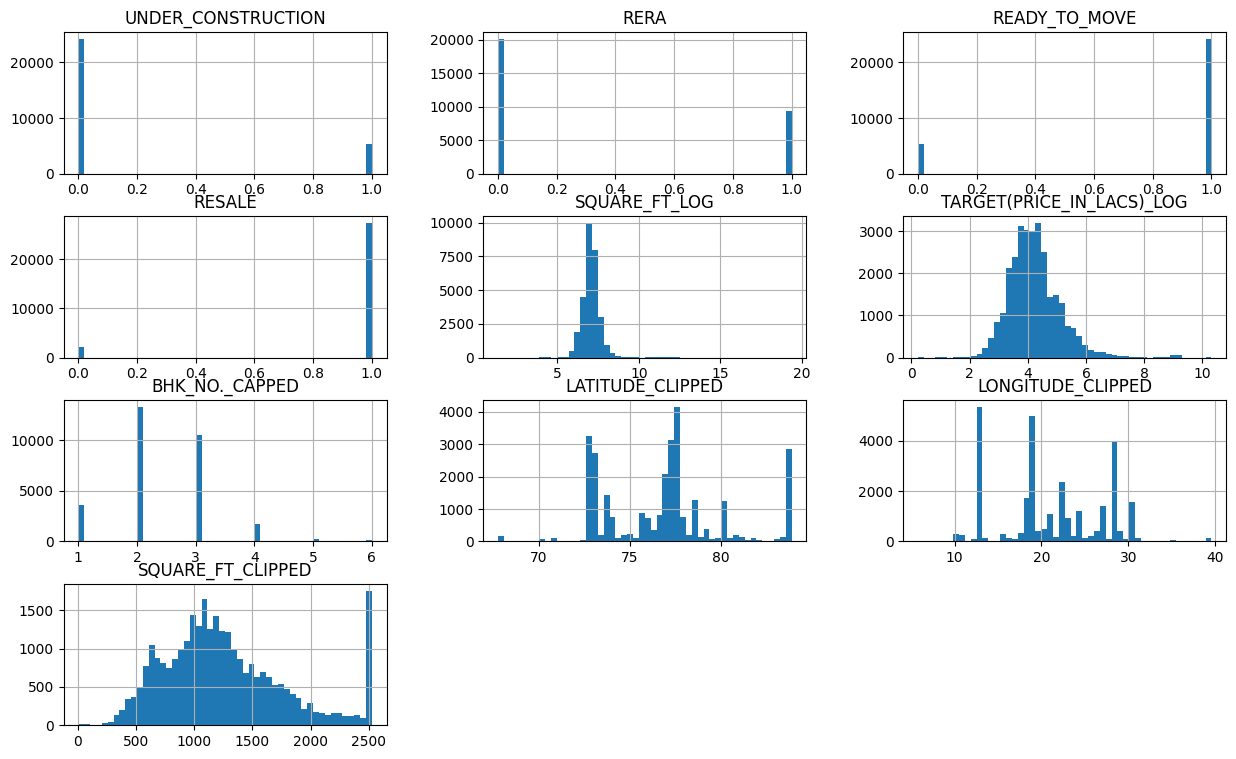

In [44]:
# Distribution of numerical features after transformation

df_num.hist(bins=50, figsize=(15,9));

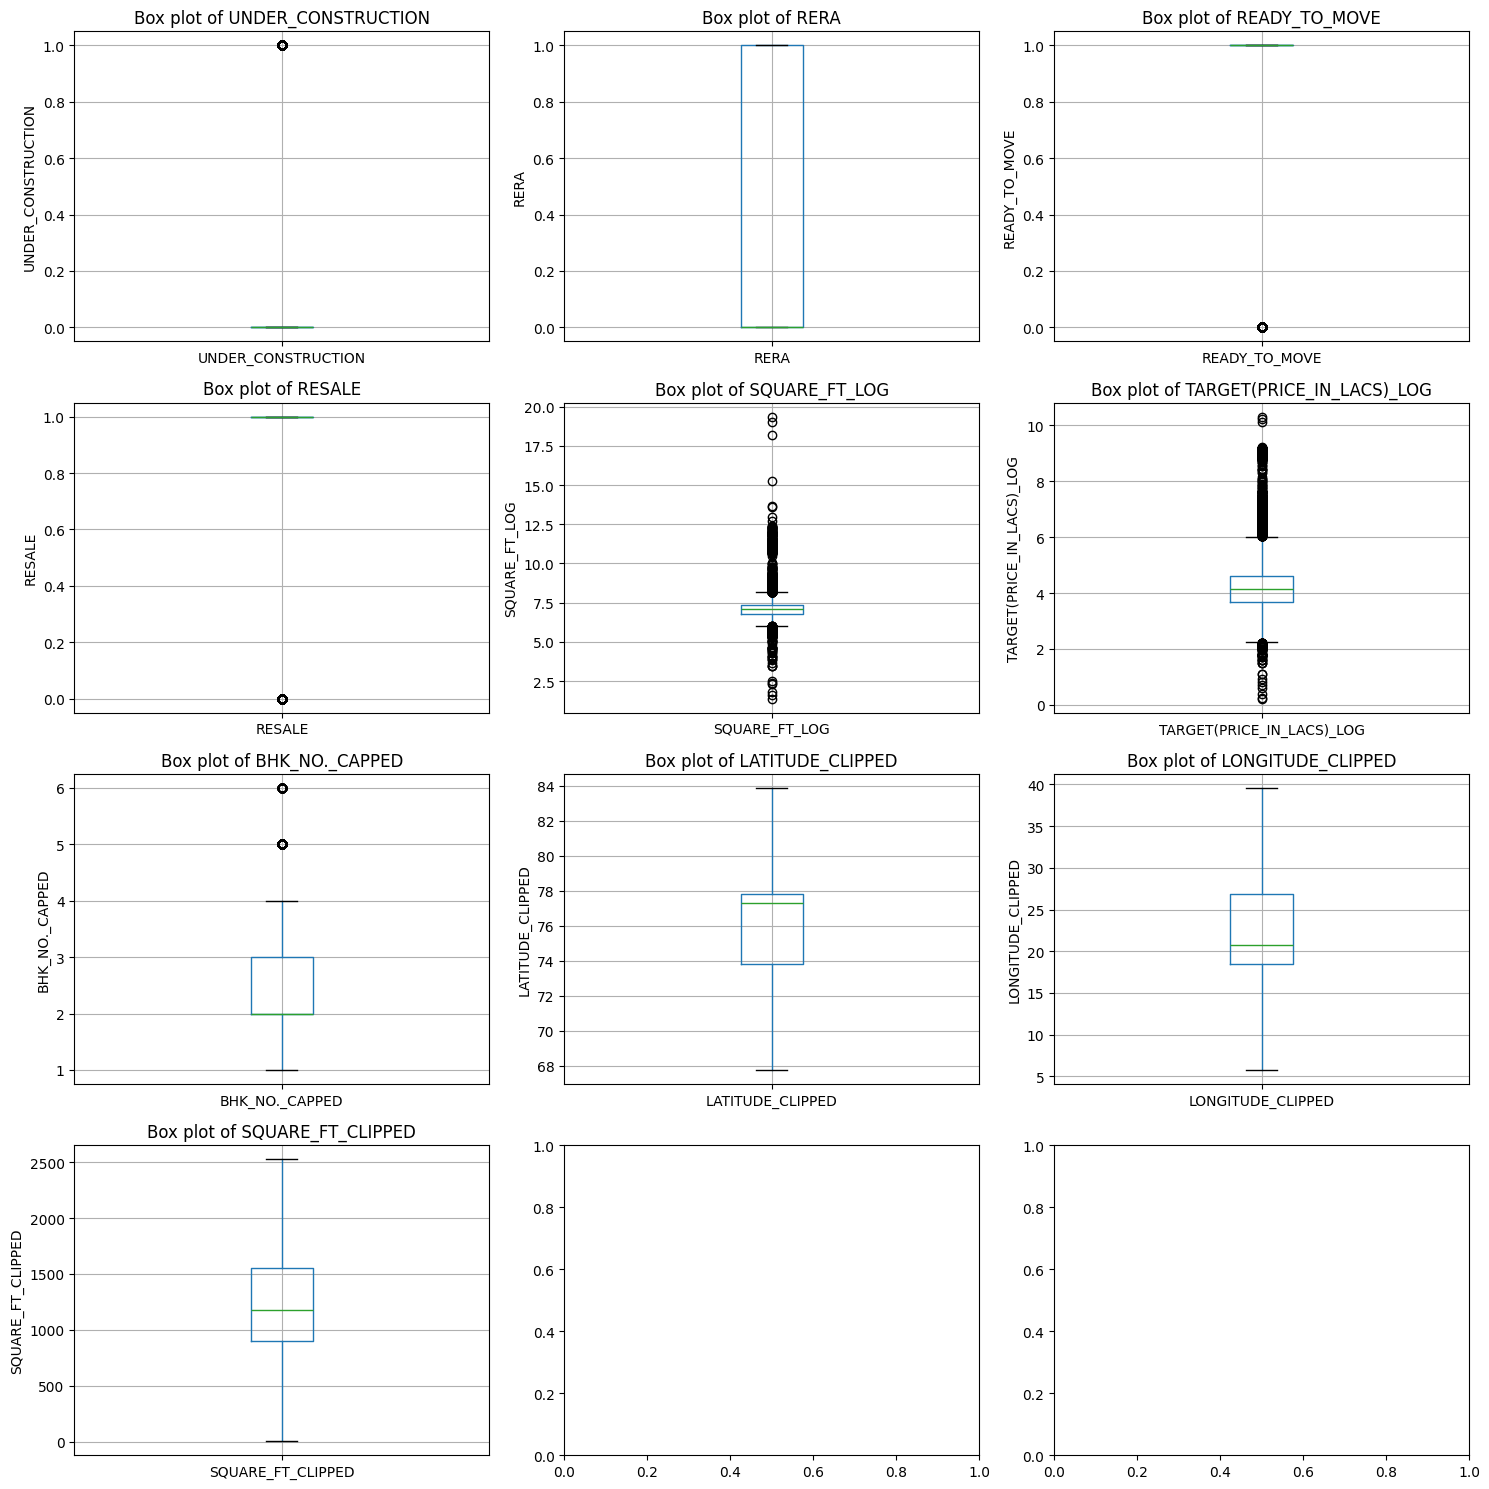

In [46]:
# box plots of numerical features after transformation
num_features = df_num.columns
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15), sharex=False, sharey=False)

for i, col in enumerate(num_features):
    df_num.boxplot(column=col, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f"Box plot of {col}")
    ax[i//3, i%3].set_ylabel(col)
plt.tight_layout()
plt.show()

<Axes: >

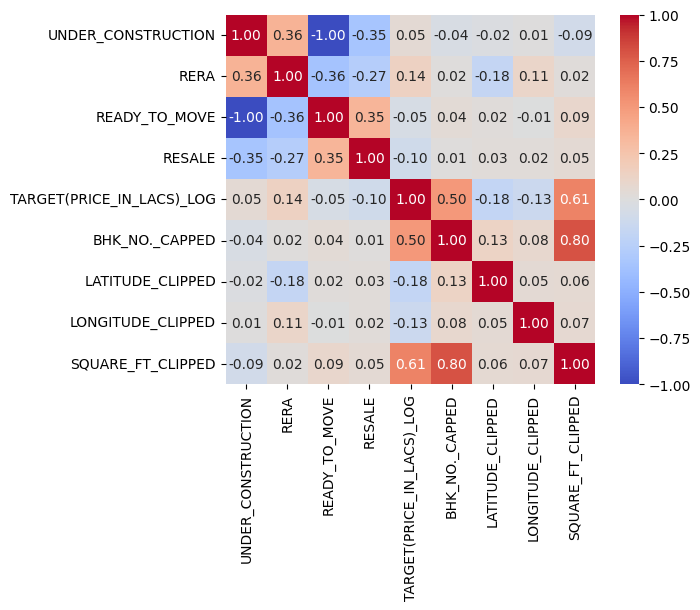

In [ ]:
# Correlation matrix
corr_mat = df_num.corr()

sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
)

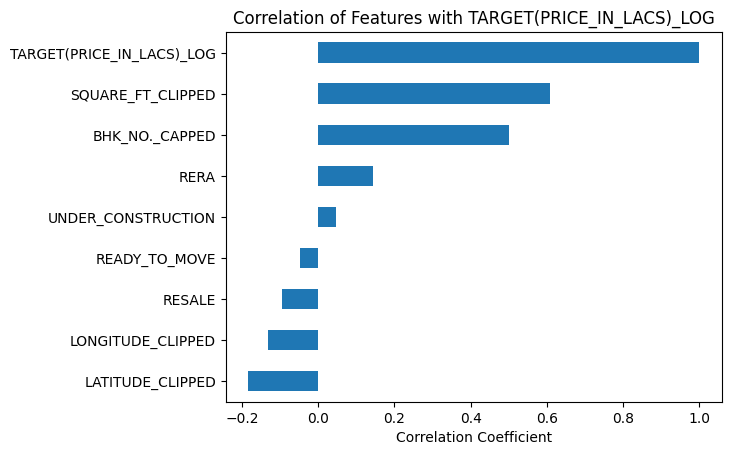

In [ ]:
corr_mat["TARGET(PRICE_IN_LACS)_LOG"].sort_values(ascending=True).plot(kind="barh")
plt.title("Correlation of Features with TARGET(PRICE_IN_LACS)_LOG")
plt.xlabel("Correlation Coefficient");

Text(0.5, 0.98, '')

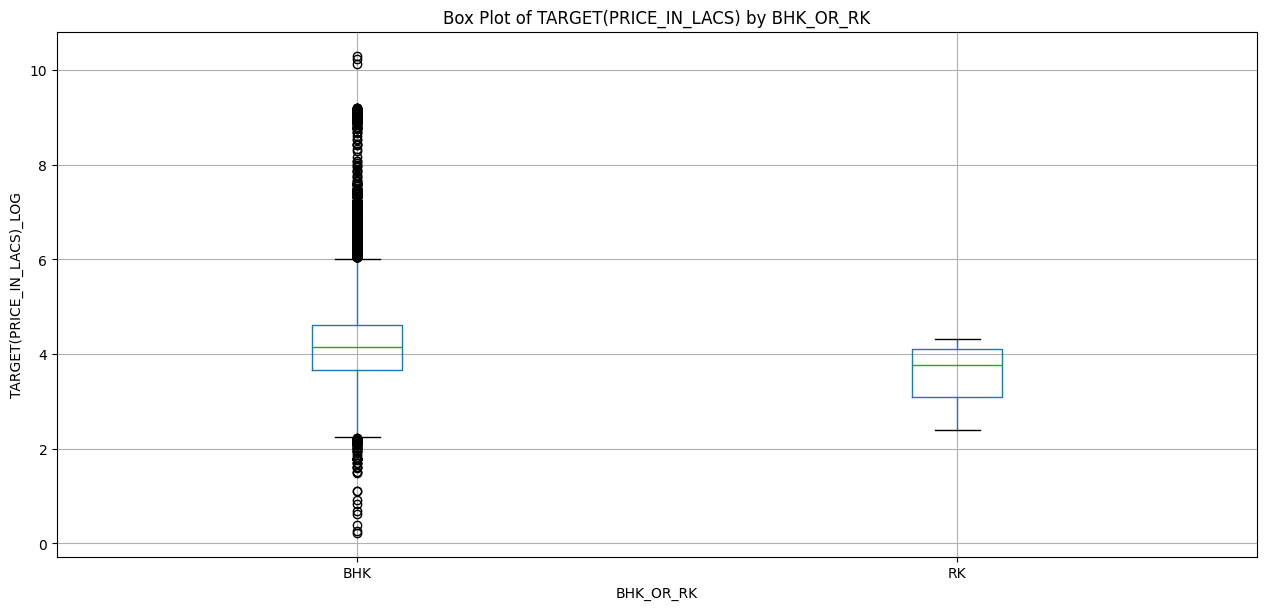

In [ ]:
# compare BHK_OR_RK with target price

df.boxplot(column="TARGET(PRICE_IN_LACS)_LOG", by="BHK_OR_RK", figsize=(15,7))
plt.title("Box Plot of TARGET(PRICE_IN_LACS) by BHK_OR_RK")
plt.xlabel("BHK_OR_RK")
plt.ylabel("TARGET(PRICE_IN_LACS)_LOG")
plt.suptitle("")  # Suppress the automatic title to avoid overlap

Text(0.5, 0.98, '')

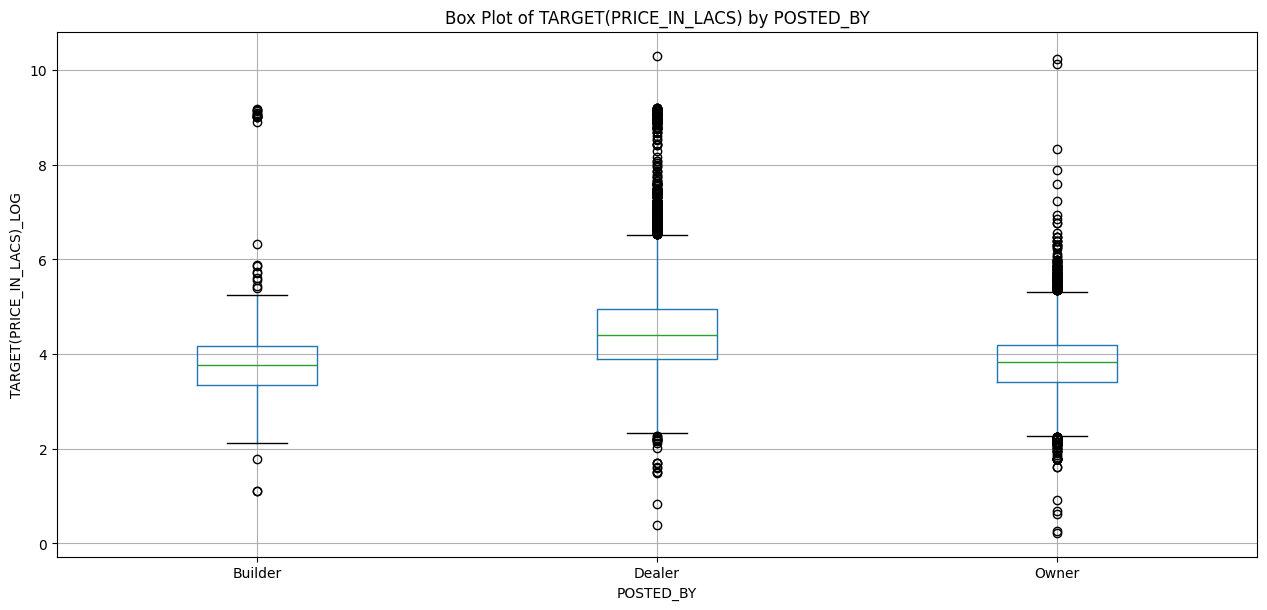

In [ ]:
#  compare POSTED_BY with target price

df.boxplot(column="TARGET(PRICE_IN_LACS)_LOG", by="POSTED_BY", figsize=(15,7))
plt.title("Box Plot of TARGET(PRICE_IN_LACS) by POSTED_BY")
plt.xlabel("POSTED_BY")
plt.ylabel("TARGET(PRICE_IN_LACS)_LOG")
plt.suptitle("")  # Suppress the automatic title to avoid overlap

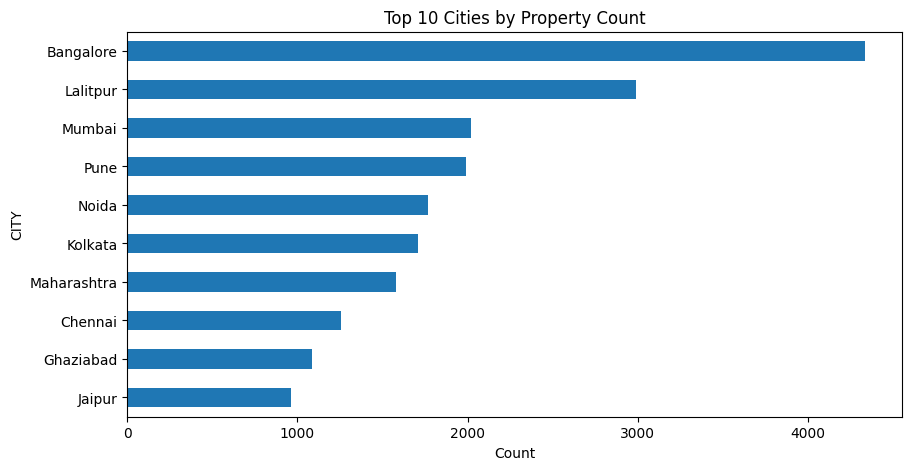

In [ ]:
#  Top cities by property count
df["CITY"].value_counts(ascending=True).tail(10).plot(kind="barh", figsize=(10,5))
plt.title("Top 10 Cities by Property Count")
plt.xlabel("Count");